In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [3]:
df_white_wine = pd.read_csv('winequality-white.csv', delimiter=';')
df_white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
df_red_wine = pd.read_csv('winequality-red.csv', delimiter=';')
df_red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1. Проведите первичный анализ данных: изучите типы переменных, наличие пропусков, статистические характеристики

In [5]:
df_white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


1. Данные о белом вине содержат информаю по 12 характеристикам белого вина, всего 4898 записей. Пропуском в данных нет.
2. Все характеристики (переменные) имеют числовое значение (непрерывное числовое значение), тип float64
3. Только тагрет (quality) имеет целочисленное значение, поэтому может быть категориальным признаком.

In [6]:
df_red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


1. Данные о красном вине содержат информаю по 12 характеристикам красного вина, всего 1599 записей. Пропуском в данных нет.
2. Все характеристики (переменные) имеют числовое значение (непрерывное числовое значение), тип float64
3. Только тагрет (quality) имеет целочисленное значение, поэтому может быть категориальным признаком.

In [8]:
df_white_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [9]:
df_red_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


2. Визуализируйте распределение количественных переменных с помощью гистограмм и box plot.

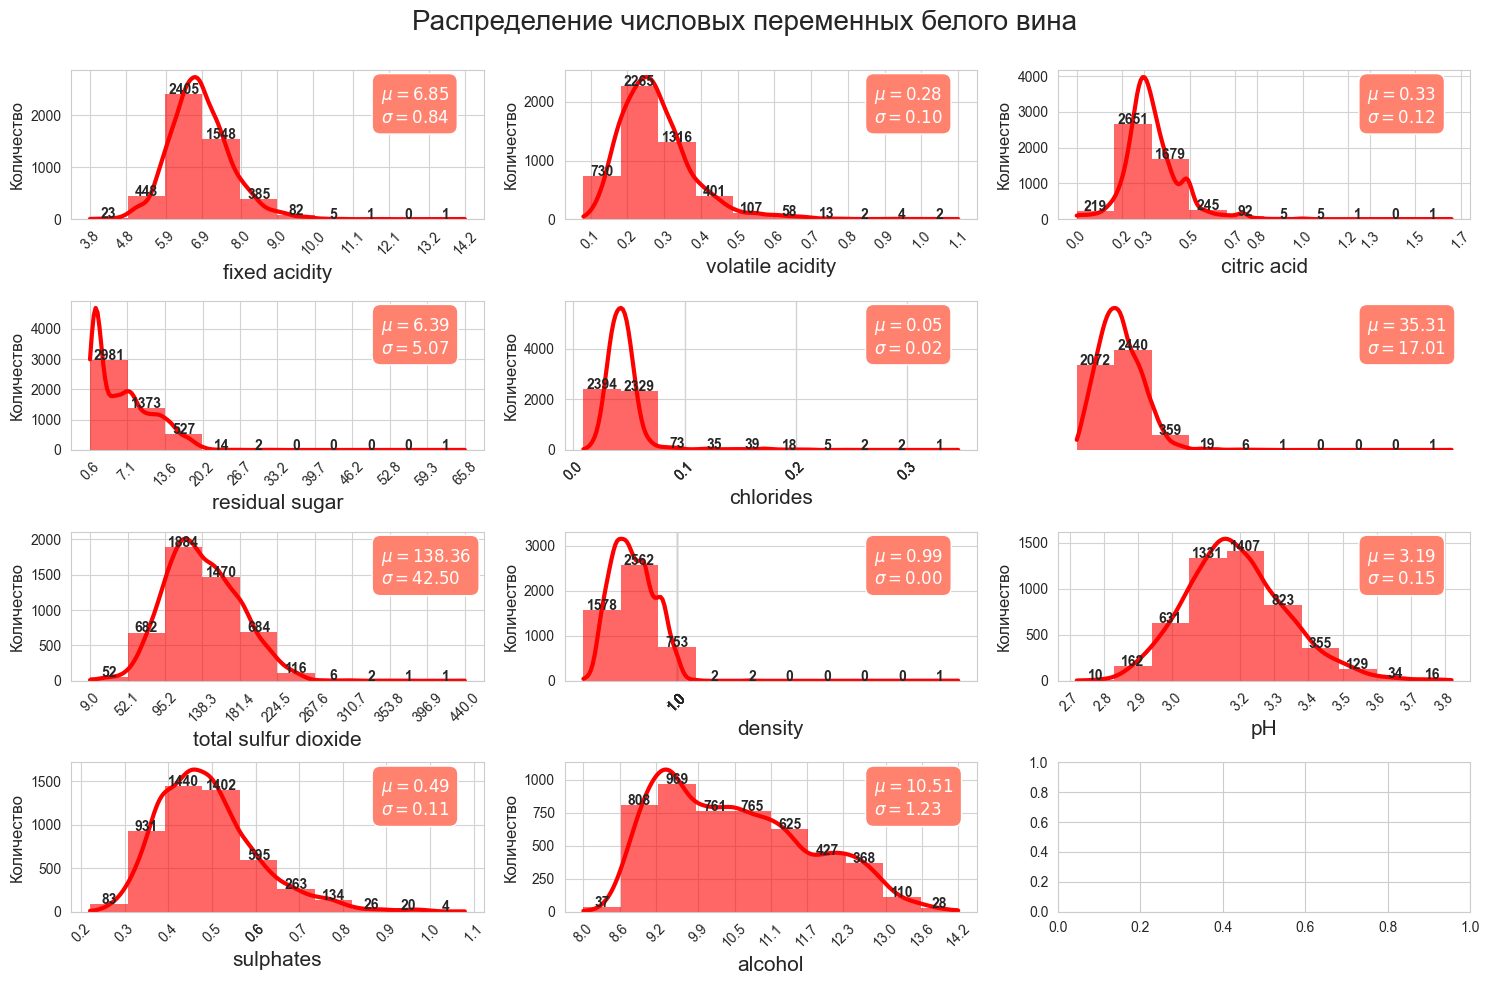

In [45]:
continuous_features = df_white_wine.columns.drop('quality')

df_continuous_w = df_white_wine[continuous_features]

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

# Цикл для построения гистограмм для каждого числового признака
for i, col in enumerate(df_continuous_w.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous_w[col],
                                     range=(df_continuous_w[col].min(), df_continuous_w[col].max()))

    graph = sns.histplot(data=df_continuous_w, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous_w[col].mean(),
        r'$\sigma=%.2f$' % df_continuous_w[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Распределение числовых переменных белого вина', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

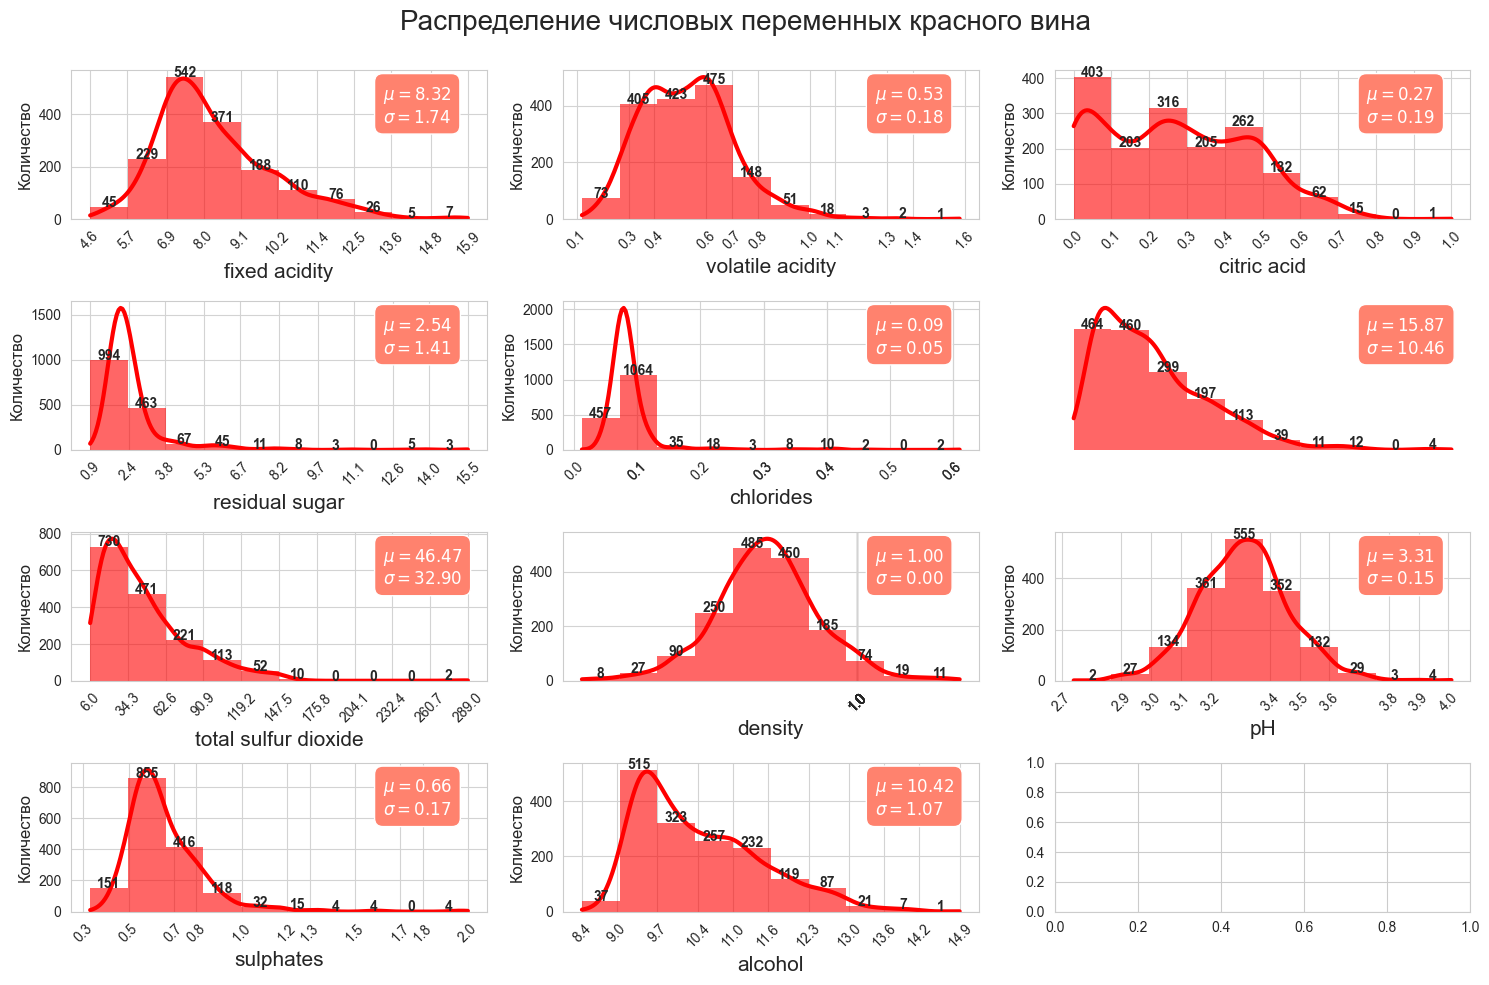

In [46]:
continuous_features = df_red_wine.columns.drop('quality')

df_continuous_r = df_red_wine[continuous_features]

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

# Цикл для построения гистограмм для каждого числового признака
for i, col in enumerate(df_continuous_r.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous_r[col],
                                     range=(df_continuous_r[col].min(), df_continuous_r[col].max()))

    graph = sns.histplot(data=df_continuous_r, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous_r[col].mean(),
        r'$\sigma=%.2f$' % df_continuous_r[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Распределение числовых переменных красного вина', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

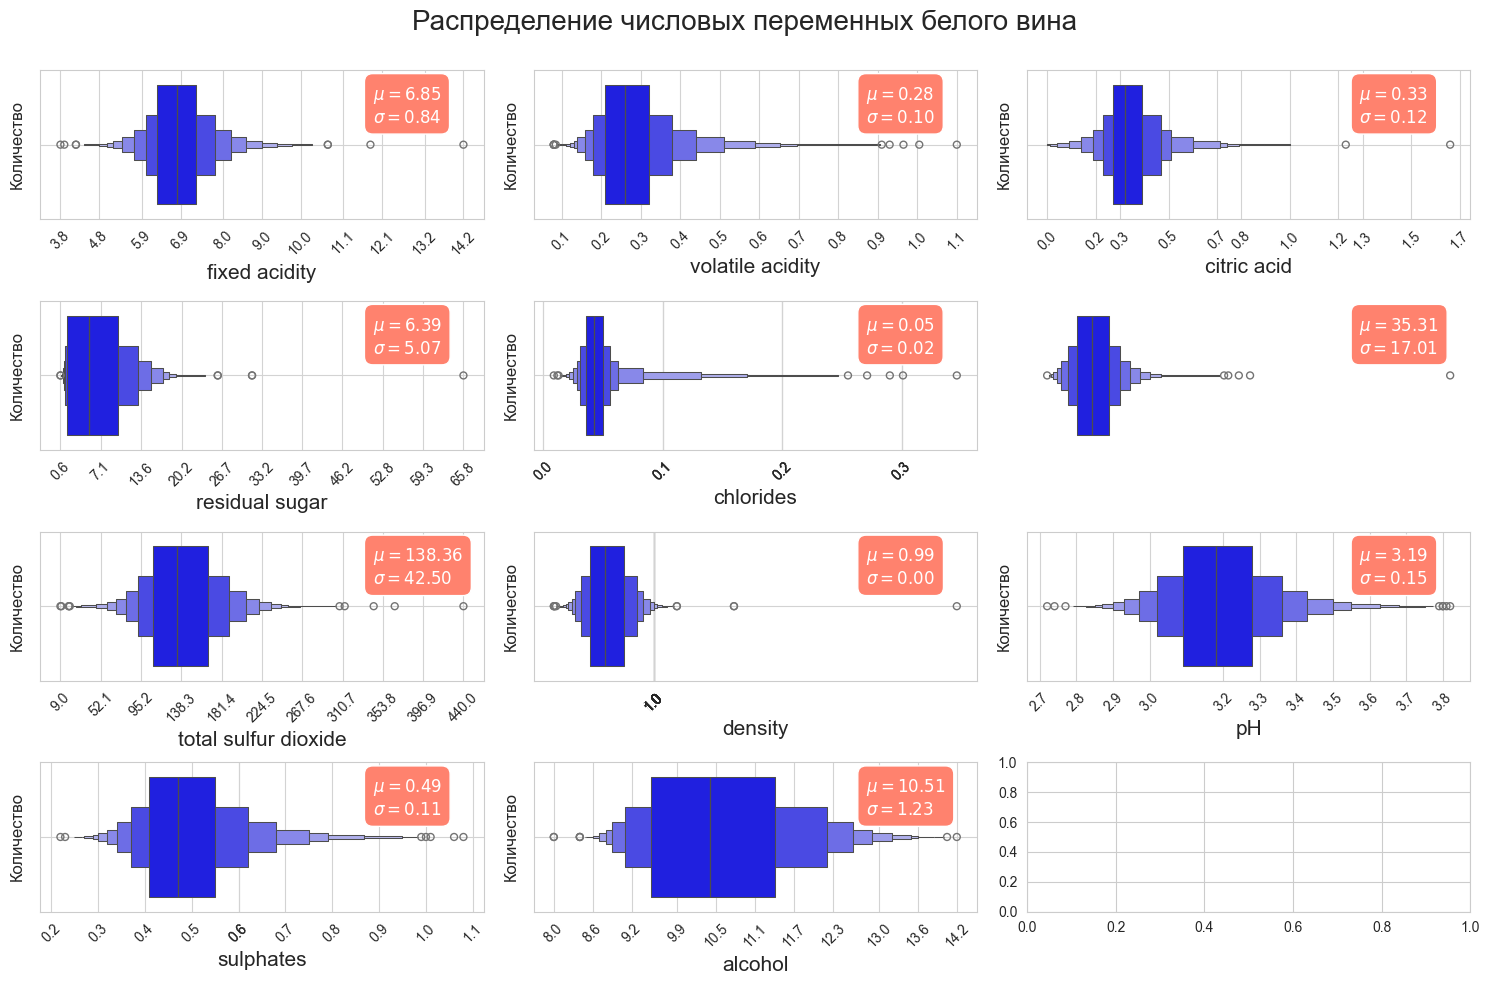

In [47]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

# Цикл для построения гистограмм для каждого непрерывного признака
for i, col in enumerate(df_continuous_w.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous_w[col],
                                     range=(df_continuous_w[col].min(), df_continuous_w[col].max()))

    graph = sns.boxenplot(data=df_continuous_w, x=col, ax=ax[x, y],
                         color='blue')
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')


    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous_w[col].mean(),
        r'$\sigma=%.2f$' % df_continuous_w[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Распределение числовых переменных белого вина', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

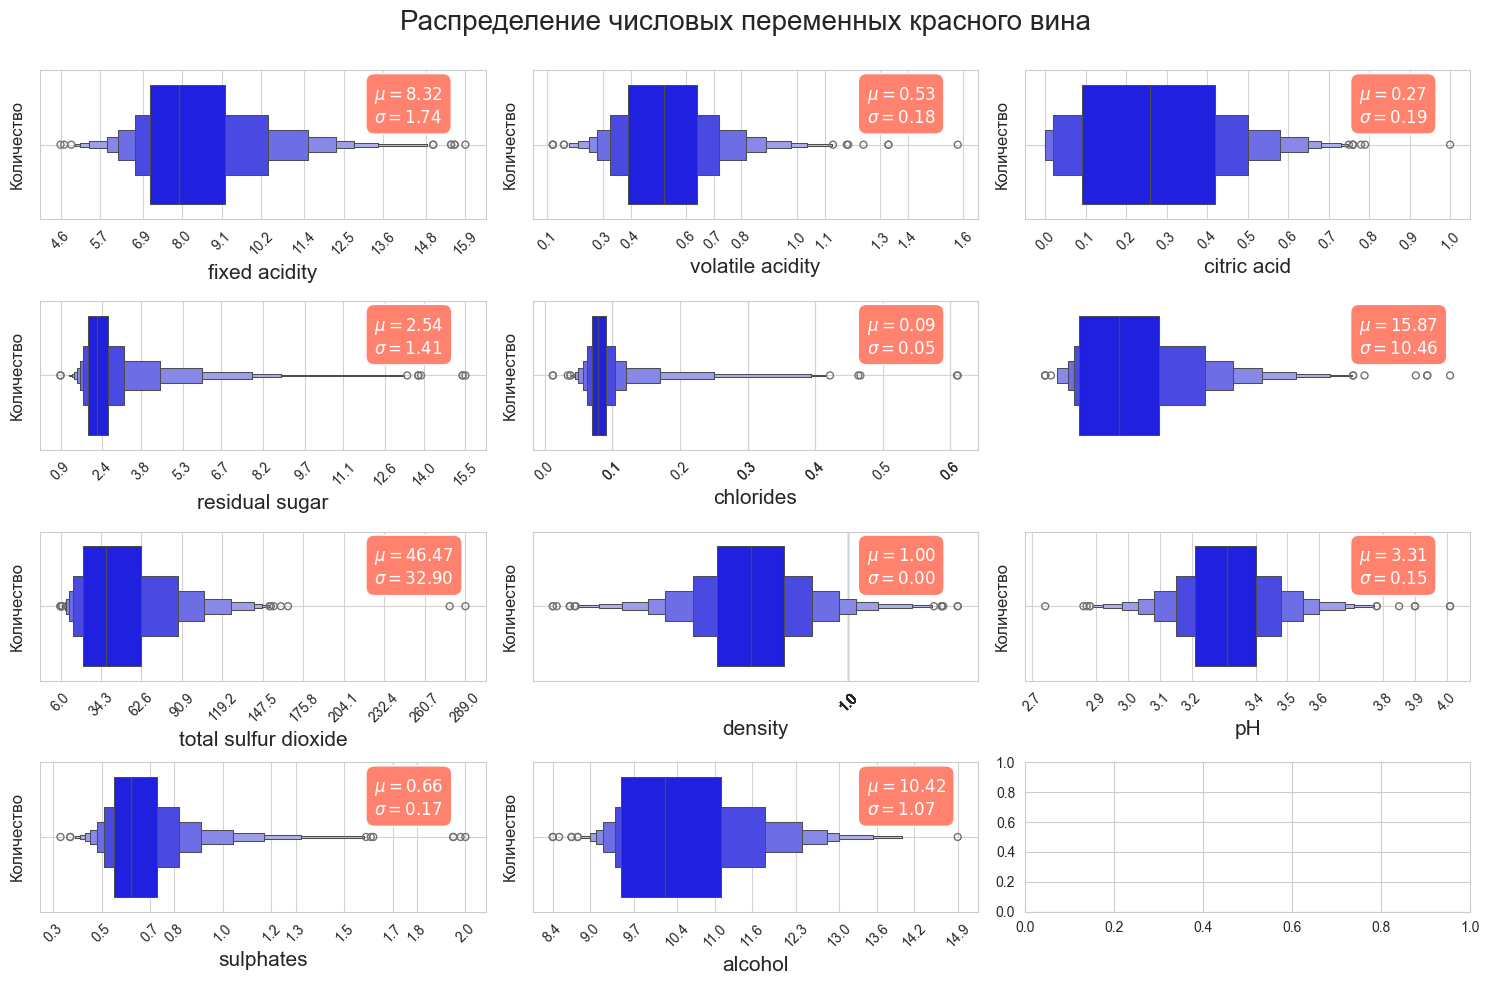

In [48]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

# Цикл для построения гистограмм для каждого непрерывного признака
for i, col in enumerate(df_continuous_r.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous_r[col],
                                     range=(df_continuous_r[col].min(), df_continuous_r[col].max()))

    graph = sns.boxenplot(data=df_continuous_r, x=col, ax=ax[x, y],
                         color='blue')
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')


    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous_r[col].mean(),
        r'$\sigma=%.2f$' % df_continuous_r[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Распределение числовых переменных красного вина', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

3. Постройте столбчатые диаграммы для анализа распределения категориальных переменных

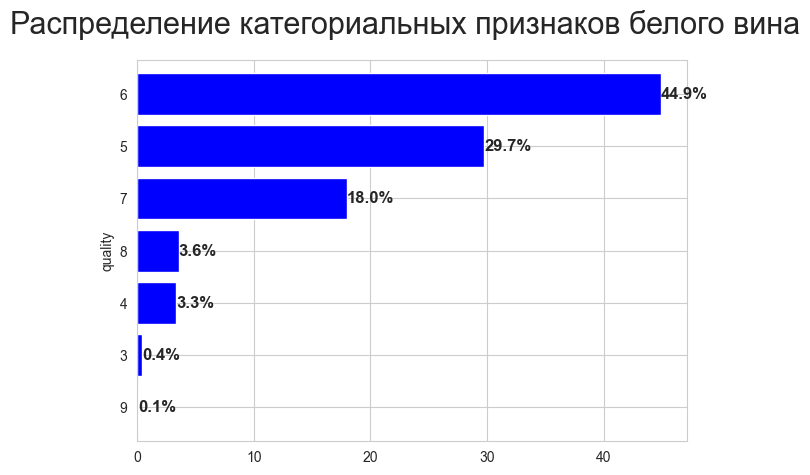

In [36]:
# Вычисление процентных значений частоты
value_counts = df_white_wine['quality'].value_counts(normalize=True).mul(100).sort_values()

# Построение столбчатой диаграммы
value_counts.plot(kind='barh', width=0.8, color='blue')
plt.suptitle('Распределение категориальных признаков белого вина', fontsize=22)
for index, value in enumerate(value_counts):
    plt.text(value, index, str(round(value, 1)) + '%',
                               fontsize=12, weight='bold', va='center')
plt.tight_layout()
plt.show()

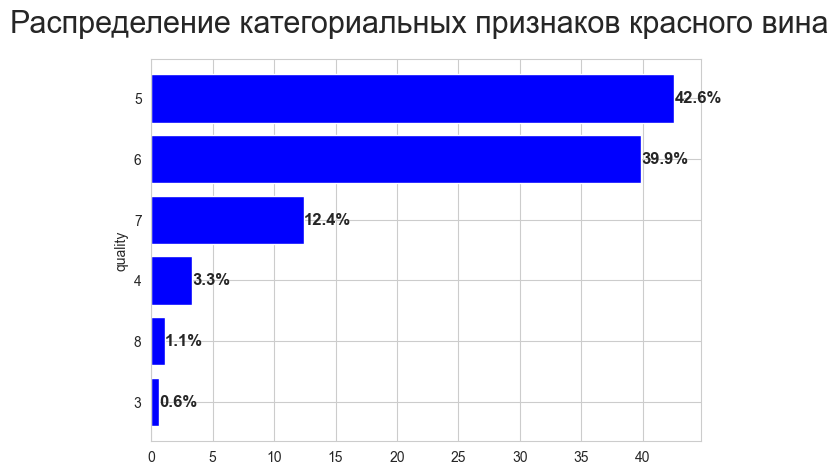

In [37]:
# Вычисление процентных значений частоты
value_counts = df_red_wine['quality'].value_counts(normalize=True).mul(100).sort_values()

# Построение столбчатой диаграммы
value_counts.plot(kind='barh', width=0.8, color='blue')

plt.suptitle('Распределение категориальных признаков красного вина', fontsize=22)
for index, value in enumerate(value_counts):
    plt.text(value, index, str(round(value, 1)) + '%',
                               fontsize=12, weight='bold', va='center')
plt.tight_layout()
plt.show()

4. Сделайте выводы о качестве данных и потенциальных взаимосвязях.

**На основе представленных статистических данных и построенных гистограмм можно сделать следующие выводы о данных по белому вину:**

1. Фиксированная кислотность (fixed_acidity): Средняя фиксированная кислотность белого вина составляет около 6,85, с минимальной кислотностью 3.8 и максимальной 14.2. Половина записей имеет фиксированную кислотность от 6.3 до 7.3 с медианой близкой к среднеарифметическому значению и равной 6.8. По графику распределение признака близко к нормальному.
2. Летучая кислотность (volatile acidity): Средняя летучая кислотность белого вина составляет около 0.28, с минимальной кислотностью 0.08 и максимальной 1.1. Половина записей имеет летучую кислотность от 0.21 до 0.32 с медианой равной 0.26. По графику распределение признака близко к нормальному.
3. Лимонная кислота (citric acid): Средний уровень лимонной кислоты белого вина составляет около 0.33, с минимальным значением 0 и максимальным 1.66. Половина записей имеет уровень лимонной кислоты от 0.27 до 0.39 с медианой равной 0.32. Вероятно существуют выбросы в данных (как минимум одно значение 1.66). По графику распределение признака признака близко к нормальному, но с более длинным правым хвостом.
4. Остаточный сахар (residual sugar): Средний уровень остаточного сахара составляет около 6.39, с минимальным значением 0.6 и максимальным 65.8. Половина данных имеет остаточный сахар между 1.7 и 9.9. Вероятно существуют выбросы в данных (как минимум одно значение 65.8). По графику распределение признака лизко к логнормальному.
5. Хлориды (chlorides): Средний уровень хлоридов составляет около 0.046, с минимальным значением 0.009 и максимальным 0.346. Половина записей имеет значение хлоридов между 0.036 и 0.05. Вероятно существуют выбросы в данных (как минимум одно значение 0.05). По графику распределение признака близко к логнормальному.
6. Свободный диоксид серы (free sulfur dioxide): Средний уровень свободного диоксида серы составляет около 35.3, с минимальным значением 2 и максимальным 289. Половина записей имеет значение свободного диоксида серы в дипапазоне между 23 и 46. Вероятно существуют выбросы в данных (три самых высоких значения). По графику распределение признака близко к логнормальному.
7. Общий диоксид серы (total sulfur dioxide): Средний уровень общего диоксида серы составляет около 138.4, с минимальным значением 9 и максимальным 440. Половина записей имеет значение свободного диоксида серы в дипапазоне между 108 и 167. Вероятно существуют выбросы в данных (три самых высоких значения). По графику распределение признака близко к логнормальному.
8. Плотность (density): Средний уровень плотности составляет около 0.994, с минимальным значением 0.987 и максимальным 1.039. Половина записей имеет значение плотности в дипапазоне между 0.992 и 0.996. Вероятно существуют выбросы в данных (как минимум одно значение 1.039). По графику распределение признака близко к нормальному.
9. pH: Средний уровень pH составляет около 3.19, с минимальным значением 2.72 и максимальным 3.82. Половина записей имеет значение pH в дипапазоне между 3.09 и 3.28. По графику распределение признака близко к нормальному.
10. Сульфаты (sulphates): Средний уровень сульфатов составляет около 0.49 с минимальным значением 0.22 и максимальным 1.08. Половина записей имеет значение сульфатов в дипапазоне между 0.41 и 0.55. По графику распределение признака признака близко к нормальному, но с более длинным правым хвостом.
11. Алкоголь (alcohol): Средний уровень алкоголя составляет около 10.51 с минимальным значением 8 и максимальным 14.2. 

**На основе представленных статистических данных можно сделать следующие выводы о красном вине:**

1. Фиксированная кислотность (fixed_acidity): Средняя фиксированная кислотность красного вина составляет около 8,32, с минимальной кислотностью 4.6 и максимальной 15.9. Половина записей имеет фиксированную кислотность от 7.1 до 9.2. Вероятно существуют выбросы в данных (как минимум одно значение 14,2). По графику распределение признака близко к нормальному, но с более длинным правым хвостом.
2. Летучая кислотность (volatile acidity): Средняя летучая кислотность красного вина составляет около 0.53, с минимальной кислотностью 0.12 и максимальной 1.58. Половина записей имеет летучую кислотность от 0.39 до 0.64. Вероятно существуют выбросы в данных (три самых высоких значения). По графику распределение признака близко к нормальному, но с более длинным правым хвостом.
3. Лимонная кислота (citric acid): Средний уровень лимонной кислоты красного вина составляет около 0.27, с минимальным значением 0 и максимальным 1. Половина записей имеет уровень лимонной кислоты от 0.09 до 0.42. Вероятно существуют выбросы в данных (как минимум одно значение 1). 
4. Остаточный сахар (residual sugar): Средний уровень остаточного сахара составляет около 2.54, с минимальным значением 1.4 и максимальным 15.5. Половина данных имеет остаточный сахар между 1.9 и 2.6. Вероятно существуют выбросы в данных (как минимум одно значение 15.5). По графику распределение признака лизко к логнормальному.
5. Хлориды (chlorides): Средний уровень хлоридов составляет около 0.087, с минимальным значением 0.012 и максимальным 0.611. Половина записей имеет значение хлоридов между 0.07 и 0.09. Вероятно существуют выбросы в данных (как минимум одно значение 0.09). По графику распределение признака близко к логнормальному.
6. Свободный диоксид серы (free sulfur dioxide): Средний уровень свободного диоксида серы составляет около 15.9, с минимальным значением 1 и максимальным 72. Половина записей имеет значение свободного диоксида серы в дипапазоне между 7 и 21. Вероятно существуют выбросы в данных (четыре самых высоких значения). По графику распределение признака близко к логнормальному.
7. Общий диоксид серы (total sulfur dioxide): Средний уровень общего диоксида серы составляет около 46.5, с минимальным значением 6 и максимальным 289. Половина записей имеет значение свободного диоксида серы в дипапазоне между 22 и 62. Вероятно существуют выбросы в данных (два самых высоких значения). По графику распределение признака близко к логнормальному.
8. Плотность (density): Средний уровень плотности составляет около 0.997, с минимальным значением 0.99 и максимальным 1.004. Половина записей имеет значение плотности в дипапазоне между 0.996 и 0.998. По графику распределение признака близко к нормальному.
9. pH: Средний уровень pH составляет около 3.31, с минимальным значением 2.74 и максимальным 4.01. Половина записей имеет значение pH в дипапазоне между 3.21 и 3.4. По графику распределение признака близко к нормальному.
10. Сульфаты (sulphates): Средний уровень сульфатов составляет около 0.66 с минимальным значением 0.33 и максимальным 2. Половина записей имеет значение сульфатов в дипапазоне между 0.55 и 0.73. По графику распределение признака признака близко к нормальному, но с более длинным правым хвостом.
11. Алкоголь (alcohol): Средний уровень алкоголя составляет около 10.42 с минимальным значением 8.4 и максимальным 14.9. 

**Анализ качетсва (таргета) для белого вина показал:**
- самое большое количество 70,9% (3,3 % +44,9% + 22,7%) это категории 4, 5, 6, то есть данные содержат 70% данных о вине, котрое оценено, как среднее.
- 21,6% (18 + 3,6), категории 7 и 8 данных о вине выше среднего качества
- и всего 0.1% данных содержат данные о вине характеризованное, как высокое качество, категория 9
- 0,4% данных о белом вине содержат данные по качеству ниже среднего (категория 3)

**Анализ качетсва (таргета) для красного вина показал:**
- самое большое количество 85,8% (3,3 % +42,6% + 39,9%) это категории 4, 5, 6, то есть данные содержат почти 86% данных о вине, которое оценено, как среднее.
- 13,5% (12.4 + 1,1), категории 7 и 8 данных о вине выше среднего качества
- 0,6% данных о белом вине содержат данные по качеству ниже среднего (категория 3)